# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Muhammad Rama Reyswara
- **Email:** muhammadramareyswara@gmail.com
- **ID Dicoding:** mramaa_r

## Menentukan Pertanyaan Bisnis

- Apa saja produk-produk yang sering di komplain customer?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached streamlit-1.39.0-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached altair-5.4.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached watchdog-5.0.3-py3-none-win_amd64.whl.metadata (41 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached narwhals-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadat


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

## Data Wrangling

### Gathering Data

In [85]:
orders = pd.read_csv('orders_dataset.csv')
order_reviews = pd.read_csv('order_reviews_dataset.csv')
order_items = pd.read_csv('order_items_dataset.csv')
products = pd.read_csv('products_dataset.csv')

**Insight:**
Memuat Dataset - dataset yang diperlukan.

### Assessing Data

In [84]:
print(orders.info())
print(order_reviews.info())
print(order_items.info())
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   order_purchase_month           99441 non-null  period[M]     
dtypes: datetime64[ns](1), object(7), period[M](1)
memory usage: 6.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
D

**Insight:**
Meng-assess beberapa row pertama pada dataset

In [83]:
print(orders.isnull().sum())
print(order_reviews.isnull().sum())
print(order_items.isnull().sum())
print(products.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_purchase_month                0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_l

Checking untuk missing values

### Cleaning Data

In [92]:
order_reviews_cleaned = order_reviews.dropna(subset=['review_comment_message'])


orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

**Insight:**
Melakukan metode dropping untuk missing values kolom review_comment_message karena jika data ini hilang, maka tidak ada data yang bisa digunakan untuk menjawab pertanyaan satu.

Sedangakan Orders dan Products hanya membutuhkan kolom order_purchase_timestamp untuk menjawab pertanyaan. Dimana kolom ini tidak memiliki Missing Values.

Dilakukan konversi kolom timestamp ke datetime agar mudah meng-extract data (dd/mm/yy) untuk dilakukan analisis data.

In [81]:
print("Jumlah row setelah cleaning: ", len(order_reviews_cleaned), '\n')
print(order_reviews_cleaned.head())

Jumlah row setelah cleaning:  40977 

                           review_id                          order_id  \
3   e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4   f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9   8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12  4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   

    review_score review_comment_title  \
3              5                  NaN   
4              5                  NaN   
9              4            recomendo   
12             4                  NaN   
15             5      Super recomendo   

                               review_comment_message review_creation_date  \
3               Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4   Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
9   aparelho eficiente. no site a ma

Menampilkan hasil setelah data cleaning.

## Exploratory Data Analysis (EDA)

### Explore ...

In [80]:
#EDA
print(order_reviews.describe())
print(order_reviews['review_score'].value_counts()) #Melihat persebaran data review

print("\nProducts")
print(products.describe())
print(products['product_category_name'].value_counts().head(10))  # 10 category barang yang sering dibeli

# Melihat jarak (timespan) antar transaksi
print("\n Jarak antar transaksi")
print(f"Transaksi pertama: {orders['order_purchase_timestamp'].min()}")
print(f"Transaksi terbaru: {orders['order_purchase_timestamp'].max()}")


       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

Products
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       produc

**Insight:**
- Menggunakan method describe() untuk menampilkan statistik.
- Jangka waktu pesanan dari data pembelian pertama sampai terbaru dihitung untuk mendapatkan insight tentang jangka waktu (timespan) dataset.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

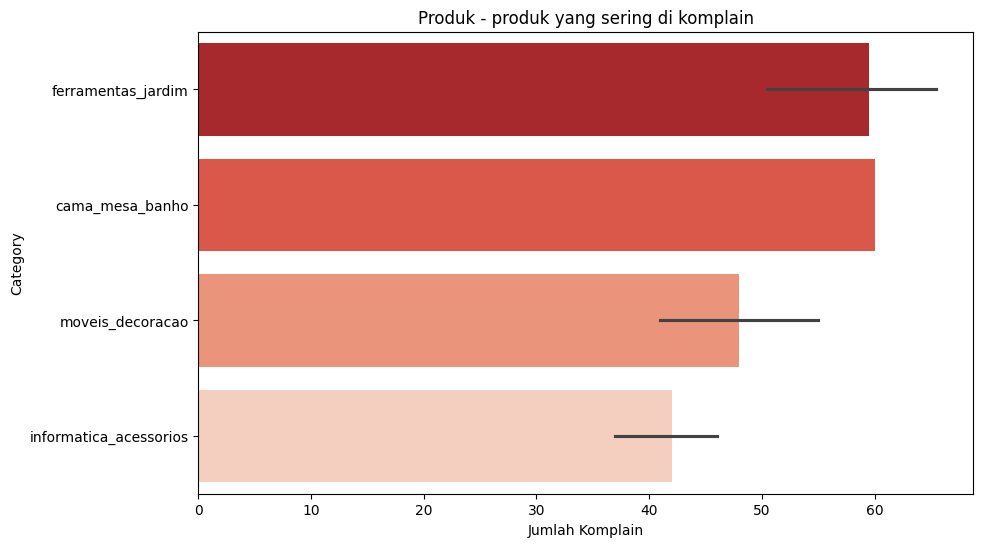

In [79]:
# Merge order_reviews dengan orders
komplain = pd.merge(order_reviews_cleaned, orders, on='order_id', how='inner')

# Merge komplain dengan order_items buat memanggil product_id
komplain = pd.merge(komplain, order_items, on='order_id', how='inner')

# Merge komplain dengan products buat memanggil deskripsi product
komplain = pd.merge(komplain, products, on='product_id', how='inner')

# Melakukan groupby untuk komplain rendah dengan benchmark (dibawah atau samadengan 2)
komplain['is_komplain'] = komplain['review_score'] <= 2
komplain_produk = komplain[komplain['is_komplain']].groupby('product_id').size().reset_index(name='complaints_count')

# Merge dengan produk untuk memanggil nama produk
komplain_produk = pd.merge(komplain_produk, products[['product_id', 'product_category_name']], on='product_id', how='inner')

# sort produk berdasarkan komplain
komplain_produk_sorted = komplain_produk.sort_values(by='complaints_count', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=komplain_produk_sorted.head(10), x='complaints_count', y='product_category_name', palette='Reds_r')
plt.title('Produk - produk yang sering di komplain')
plt.xlabel('Jumlah Komplain')
plt.ylabel('Category')
plt.show()


### Pertanyaan 2:

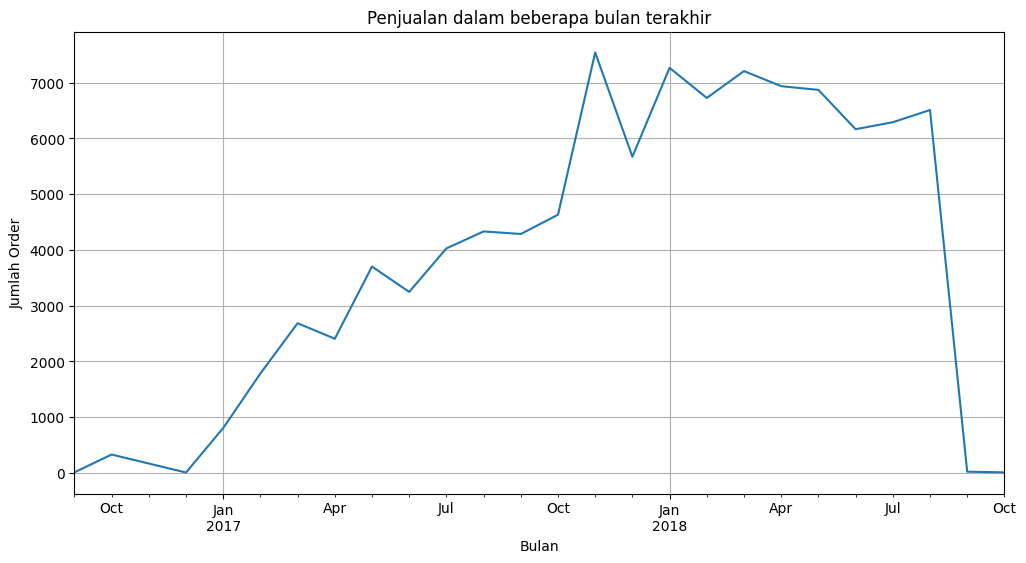

In [94]:
# Mengambil data Bulanan
orders['order_purchase_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = orders.groupby('order_purchase_month').size()

# Visualisasi
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Penjualan dalam beberapa bulan terakhir')
plt.ylabel('Jumlah Order')
plt.xlabel('Bulan')
plt.grid(True)
plt.show()

**Insight:**
- Pertanyaan 1, ditemukan produk dengan rating terendah dengan asumsi /benchmark rating rendah adalah kurang dari atau samadengan 2
- Pertanyaan 2, Mengambil data bulan dari kolom orders_purchase_timestamp yang telah dikonversi kedalam bentuk datetime.

## Analisis Lanjutan (Opsional)

## Conclusion

- Untuk pertanyaan 1 dapat disimpulkan bahwa ferramentas_jardim (peralatan perkebunan) adalah produk yang paling sering dikeluhkan, diikuti oleh cama_mesa_banho. Kategori informatica_acessorios memiliki jumlah komplain paling sedikit.

- Grafik penjualan memberikan gambaran umum penjualan perusahaan Olits dalam beberapa bulan terakhir. Terlihat adanya uptren penjualan dari pertengahan tahun 2017 sampai awal tahun 2018. Tapi setelah mencapai puncaknya pada bulan Oktober 2017, penjualan mengalami penurunan yang cukup tajam pada akhir tahun 2018.